# Course Project

## Choose tutors
### Choose proper tutors for math exam

Ваша задача этом соревновании - предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

https://www.kaggle.com/c/choose-tutors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

## Exploration Data Analysis

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("train -  rows:",train.shape[0]," columns:", train.shape[1])
print("test -  rows:",test.shape[0]," columns:", test.shape[1])

train -  rows: 10000  columns: 13
test -  rows: 10000  columns: 12


In [4]:
train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [6]:
train.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0
5,5,37.0,3.0,1050.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0
6,6,54.0,3.0,800.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52.0,1
7,7,32.0,2.0,2750.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,95.0,0
8,8,56.0,3.0,1300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,0
9,9,44.0,4.0,2350.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [8]:
test.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14999.50000,45.924500,1.985700,1699.910000,1.702300,0.372100,0.128100,0.115800,0.049000,0.029200,0.015100,64.149400
std,2886.89568,8.031977,1.771217,526.260094,0.789644,0.483389,0.334218,0.320001,0.215879,0.168375,0.121957,13.570096
min,10000.00000,23.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,12499.75000,41.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,14999.50000,46.000000,2.000000,1550.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,17499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,19999.00000,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000


In [9]:
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


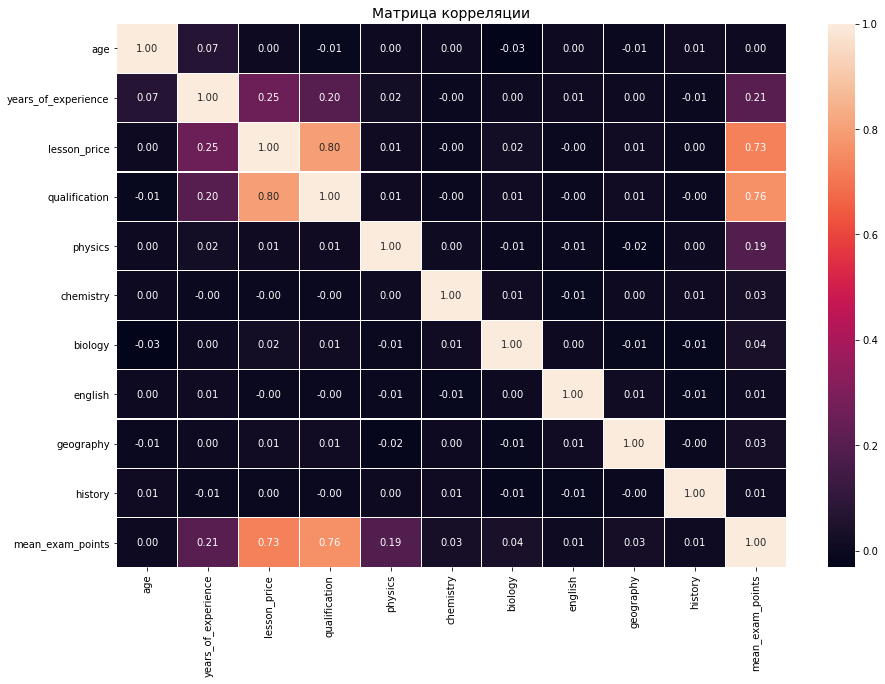

In [16]:
df_corr = train.drop(['Id', 'choose'], axis=1).corr()
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(df_corr, annot=True, linewidths=0.1, fmt='.2f', ax=ax)
            
plt.title('Матрица корреляции', size=14)
plt.show()

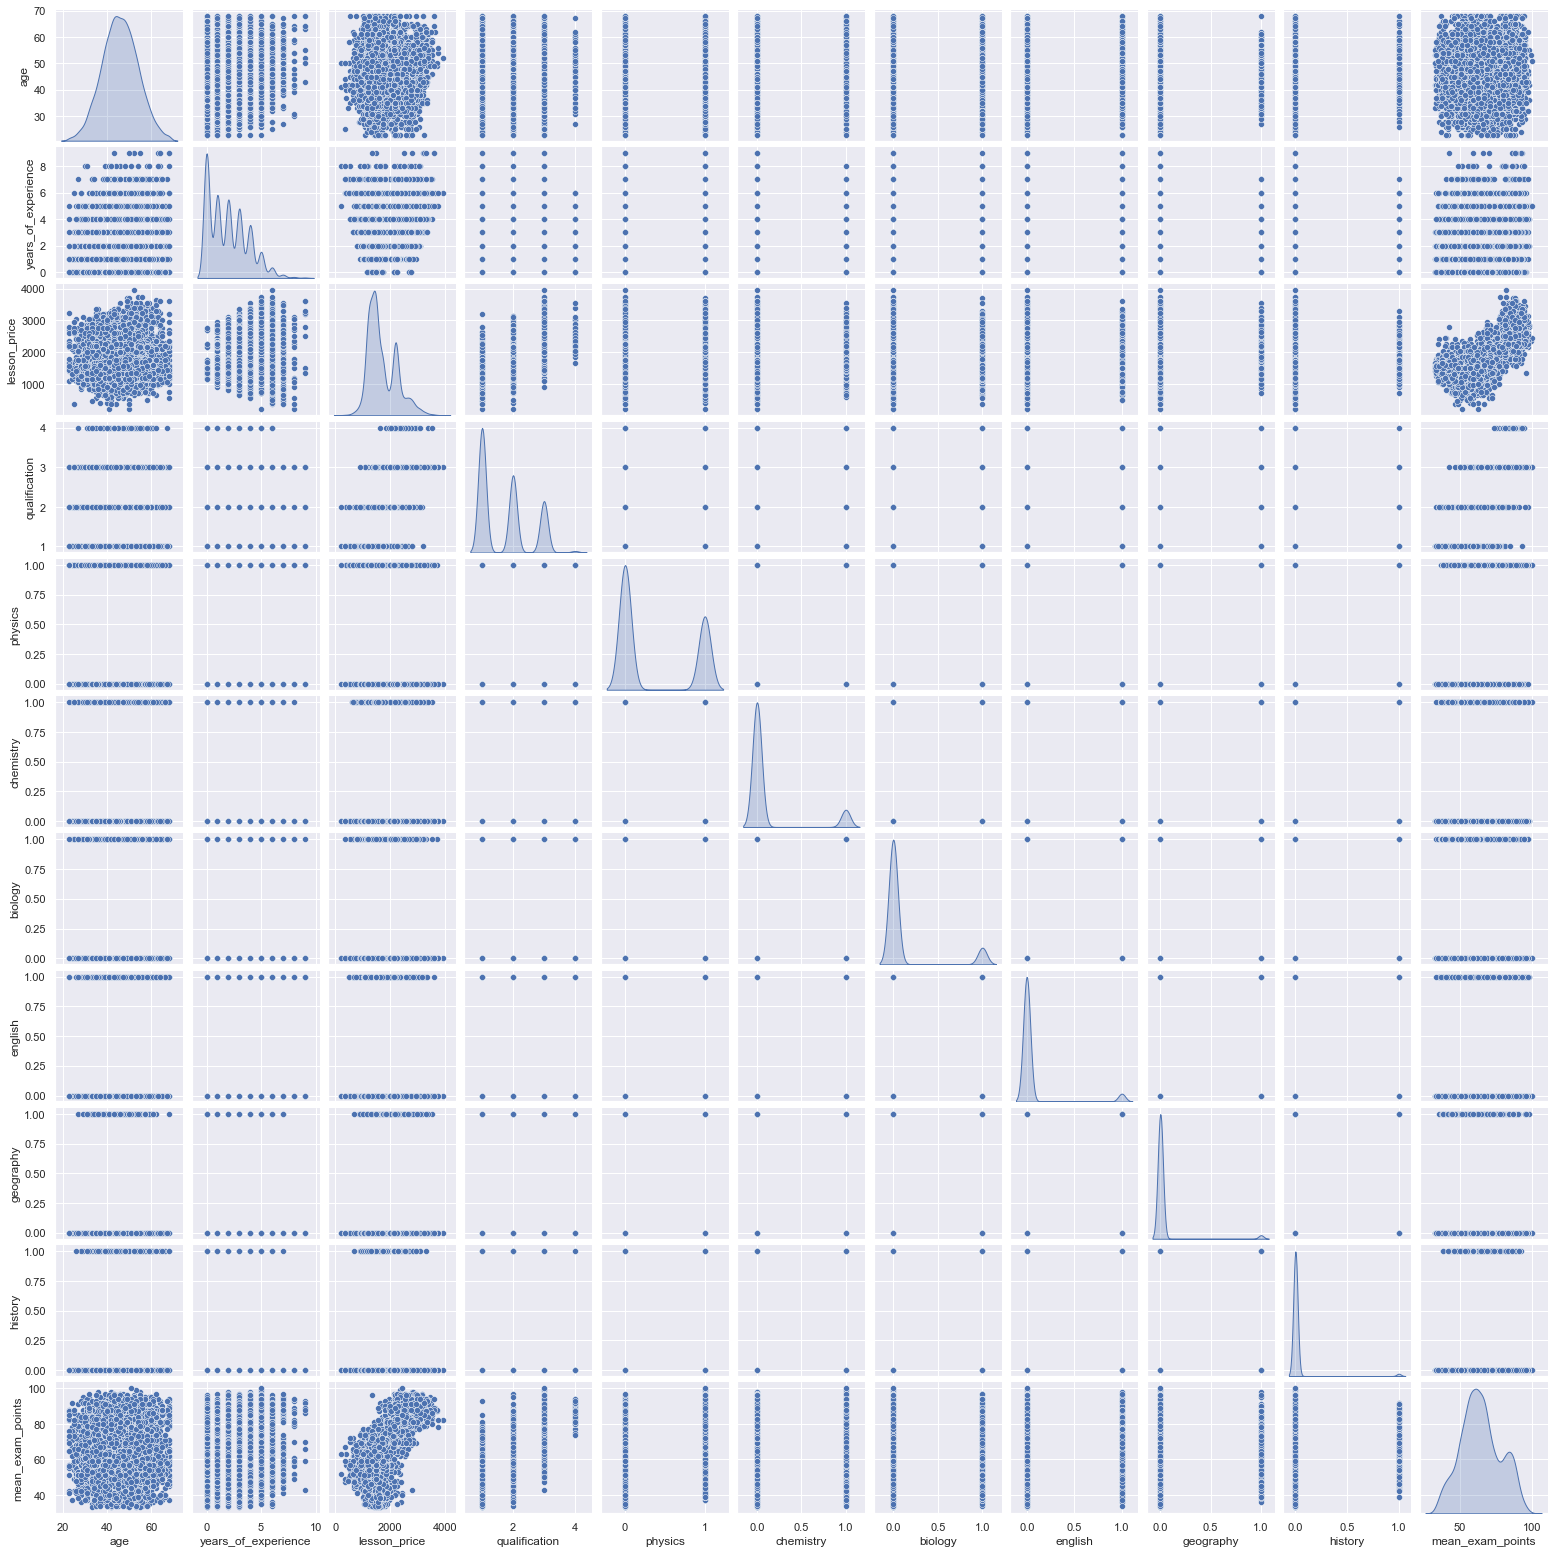

In [24]:
sns.set()
columns = [
    "age",
    "years_of_experience",
    "lesson_price",
    "qualification",
    "physics",
    "chemistry",
    "biology",
    "english",
    "geography",
    "history",
    "mean_exam_points"
]

sns.pairplot(train[columns], height=2, kind="scatter", diag_kind="kde")
plt.show()

In [25]:
X = np.array(train.drop(['Id', 'choose'], axis = 1))
y = np.array(train['choose'])
X_t = np.array(test.drop(['Id'], axis = 1))

In [26]:
X.shape

(10000, 11)

In [27]:
y.shape

(10000,)

In [28]:
X_t.shape

(10000, 11)

## Decision tree

In [29]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction

In [30]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [31]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [32]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [33]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [34]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [35]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [36]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [37]:
# Введем функцию подсчета точности как доли правильных ответов
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=1)

In [46]:
%%time
my_tree = build_tree(X_train, y_train)

Wall time: 4.77 s


In [47]:
train_answers = predict(X_train, my_tree)
answers = predict(X_test, my_tree)
train_accuracy = accuracy_metric(y_train, train_answers)
test_accuracy = accuracy_metric(y_test, answers)
print(f'train accuracy - {train_accuracy:.4f}, test accuracy - {test_accuracy:.4f}')

train accuracy - 92.2405, test accuracy - 87.8095


In [48]:
dec_tree = build_tree(X, y)

In [49]:
final_answers_dt = pd.DataFrame(zip(test['Id'], predict(X_t, dec_tree)))

In [50]:
final_answers_dt.to_csv('VOtroschenko_predictions_dectree.csv', sep=",", index=False, header=['Id', 'choose'])

In [51]:
final_answers_dt

,0,1
0,10000,0
1,10001,1
2,10002,0
3,10003,0
4,10004,0
...,...,...
9995,19995,0
9996,19996,0
9997,19997,0
9998,19998,1


## Decision tree (entropy)

In [52]:
# Расчет критерия Энтропии

def entropy(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 0
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p *np.log2(p)
        
    return impurity

def quality_entropy(left_labels, right_labels, current_entropy):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_entropy - p * entropy(left_labels) - (1 - p) * entropy(right_labels)

def find_best_split_entropy(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_entropy = entropy(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality_entropy(true_labels, false_labels, current_entropy)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

def build_tree_entropy(data, labels):

    quality, t, index = find_best_split_entropy(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree_entropy(true_data, true_labels)
    false_branch = build_tree_entropy(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
my_tree_entropy = build_tree_entropy(X_train, y_train)
train_answers = predict(X_train, my_tree_entropy)
answers = predict(X_test, my_tree_entropy)
train_accuracy = accuracy_metric(y_train, train_answers)
test_accuracy = accuracy_metric(y_test, answers)
# print_tree(my_tree_e, spacing="")
print("train_accuracy: {:.4f}\ttest_accuracy: {:.4f}".format(train_accuracy, test_accuracy))

train_accuracy: 92.3500	test_accuracy: 87.5500


In [61]:
entropy_tree = build_tree_entropy(X, y)

In [62]:
final_answers_entropy = pd.DataFrame(zip(test['Id'], predict(X_t, entropy_tree)))

In [63]:
final_answers_entropy.to_csv('VOtroschenko_predictions_entropy.csv', sep=',', index=False, header=['Id', 'choose'])

In [64]:
final_answers_entropy

,0,1
0,10000,0
1,10001,1
2,10002,0
3,10003,0
4,10004,1
...,...,...
9995,19995,0
9996,19996,0
9997,19997,0
9998,19998,1


## Random Forest

In [73]:
def get_bootstrap(data, labels, N):
    
    np.random.seed(5)
    n_samples = int(data.shape[0] * 0.9)
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = np.random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [74]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(len_sample / 2)
    subsample = []
    
    np.random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [75]:
def find_best_split_rf(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 3

    current_entropy = entropy(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    subsample = get_subsample(n_features)
    
    for index in subsample:
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее min_leaf объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_entropy)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [76]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [77]:
def build_tree_rf(data, labels):

    quality, t, index = find_best_split_rf(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree_rf(true_data, true_labels)
    false_branch = build_tree_rf(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [78]:
def tree_vote(forest, data):
   
    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [79]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=1)

In [80]:
%%time
train_accuracy_list = []
test_accuracy_list = []

for n_trees in [1, 3, 5, 10, 50]:
    my_forest = random_forest(X_train, y_train, n_trees)
    train_answers = tree_vote(my_forest, X_train)
    test_answers = tree_vote(my_forest, X_test)
    train_accuracy = accuracy_metric(y_train, train_answers)
    train_accuracy_list.append(train_accuracy)
    test_accuracy = accuracy_metric(y_test, test_answers)
    test_accuracy_list.append(test_accuracy)
    print()
    print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.4f}')
    print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.4f}')


Точность случайного леса из 1 деревьев на обучающей выборке: 89.0625
Точность случайного леса из 1 деревьев на тестовой выборке: 83.6000

Точность случайного леса из 3 деревьев на обучающей выборке: 91.7000
Точность случайного леса из 3 деревьев на тестовой выборке: 87.6000

Точность случайного леса из 5 деревьев на обучающей выборке: 92.5625
Точность случайного леса из 5 деревьев на тестовой выборке: 87.9500

Точность случайного леса из 10 деревьев на обучающей выборке: 92.5875
Точность случайного леса из 10 деревьев на тестовой выборке: 89.8500

Точность случайного леса из 50 деревьев на обучающей выборке: 93.1000
Точность случайного леса из 50 деревьев на тестовой выборке: 90.0000
Wall time: 5min 45s


In [81]:
ran_forest = random_forest(X, y, 10)

In [85]:
final_answers_rf = pd.DataFrame(zip(test['Id'], np.array(tree_vote(ran_forest, X_t), dtype=int)))

In [86]:
final_answers_rf.to_csv('VOtroschenko_predictions_randforest.csv', sep=",", index=False, header=['Id', 'choose'])

In [87]:
final_answers_rf

,0,1
0,10000,0
1,10001,0
2,10002,0
3,10003,0
4,10004,0
...,...,...
9995,19995,0
9996,19996,0
9997,19997,0
9998,19998,1
